# Decision Trees

Für dieses Projekt werden wir öffentlich verfügbare Daten von [LendingClub.com](https://de.wikipedia.org/wiki/Lending_Club) verwenden. Lending Club bringt Leute zusammen, die Geld brauchen (Leihende) und solche, die Geld investieren möchten (Geldgeber). Als Invester möchte man dann verständlicherweise vor allem an die Leute sein Geld verleihen, die es mit einer hohen Wahrscheinlichkeit zurückzahlen. Wir werden versuchen ein Modell zu erstellen, dass bei dieser Vorhersage hilft.

Wir werden Daten von 2007 bis 2010 verwenden, bevor das Unternehmen an die Börse ging. Anhand der Daten werden wir versuchen vorherzusagen, ob ein Leihender das Geld zurückgezahlt hat oder nicht. Die Daten haben wir als CSV in den Kursunterlagen beigefügt. Diese Datei wurde bereits um die nicht verfügbaren Einträge gesäubert.

Schauen wir uns noch die verfügbaren Spalten an:

* credit.policy: 1 falls der Kunde die Risikobewertung besteht, 0 falls nicht.
* purpose: Der Zweck des Kreidts (Werte sind "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", und "all_other").
* int.rate: Der Zinssatz des Kreidts als Anteil (eine Rate von 11% würde 0.11 sein). Kreditnehmer, die LendingClub.com als riskanter einstuft erhalten einen höheren Zins.
* installment: Die monatliche Zeilzahlung, die der Kreditnehmer leistet, wenn der Kredit finaziert wird.
* log.annual.inc: Der natürliche Log des angegebenen jährlichen Einkommens des Kreditnehmers.
* dti: Die "debt-to-income" Rate des Kreditnehmers (Kredit geteilt durch jährliches Einkommen.
* fico: Der FICO Kreditscore des Kreditnehmers.
* days.with.cr.line: Anzahl der Tage an denen der Kunde einen Dispokredit hatte.
* revol.bal: Die Bilanz am Ende eines Kreditkartenabrechnungszeitraums.
* revol.util: Der erstattete Anteil am Gesamtkredit.
* inq.last.6mths: Die Anzahl an Anfragen, die Kreditgeber in den letzten 6 Monaten an den Kreditnehmer gestellt haben.
* delinq.2yrs: Die Anzahl der Vorkommnisse eines Verzugs von über 30 Tagen innerhalb der letzten 2 Jahre.
* pub.rec:  Die Anzahl an negativen Einträgen (Bankrott, Steuerverzug, Verurteilungen,...) des Kreditnehmers.

## Libraries importieren

**Importiere die üblichen Libraries für Pandas und zur Visualisierung. Sklearn können wir später noch importieren.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Die Daten laden

**Nutze Pandas, um die Datei "loan_data.csv" als DataFrame namens "loans" zu laden.**

In [2]:
loans = pd.read_csv('Loan_Data.csv')

**Schau dir die info(), head() und describe() Methoden für loans an.**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Explorative Daten Analyse

Visualisieren wir nun einige Daten! Wie nutzen dazu Seaborn und Pandas eingebaute VIsualisierungsfähigkeiten. Wer möchte kann aber auch andere Methoden verwenden. Die Farben müssen z.B. nicht genau übereinstimmen. Es geht hier darum ein Verständnis für die Daten zu entwickeln!

**Erstelle ein Histogram zweier FICO Verteilungen übereinandern, je eins nach dem credit.policy Ergebnis.**

*Hinweis: Das ist bereits etwas knifflig. Keine Sorge, die Lösung hilft im Zweifelsfall weiter! Meine Empfehlung ist die Verwendung von Pandas .hist() Funktion.*

Text(0.5, 0, 'FICO')

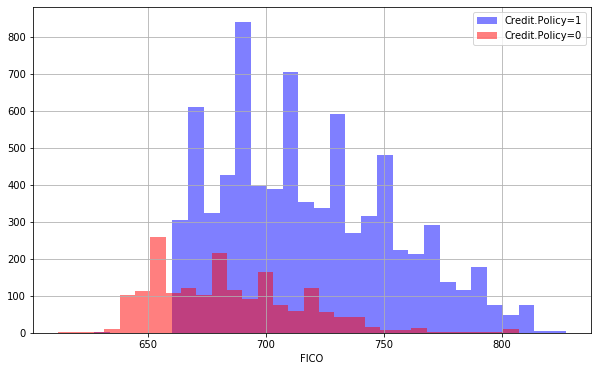

In [6]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

**Erstelle ein gleiches Diagramm, dass diesesmal nach der "not.fully.paid" Spalte trennt.**

Text(0.5, 0, 'FICO')

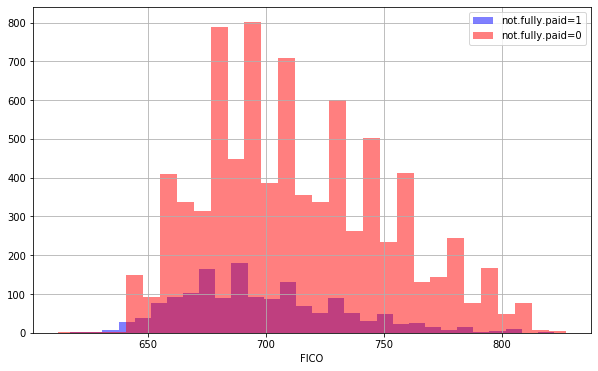

In [7]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

**Erstelle ein Countplot unter Verwendung von Seaborn, das die Anzahl der Leihgaben (en. loans) nach Zweck (en. purpose) anzeigt. Der Hue soll dabei durch die Spalte "not.fully.paid" definiert sein.**

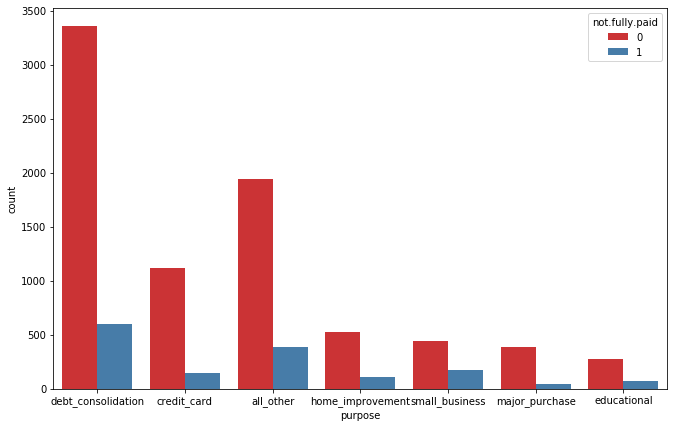

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

**Lasst uns den Trend zwischen FICO Score und den Zinsen (en. interest rate) betrachten. Stelle dazu das folgende Jointplot nach.**

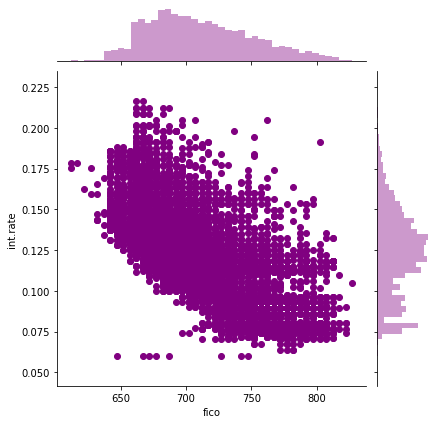

In [9]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

**Erstelle die folgenden lmplots, um zu sehen, ob sich der Trend zwischen "not.fully.paid" und "credit.policy" unterscheidet. Schau in die Dokumentation von lmplot, wenn du nicht mehr weißt, wie man in zwei Spalten aufteilt.**

<Figure size 792x504 with 0 Axes>

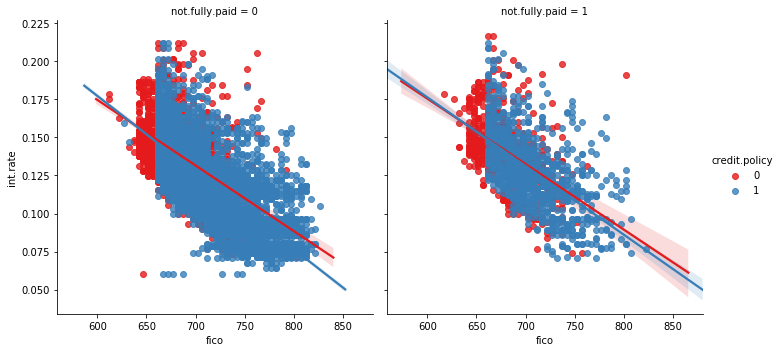

In [10]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

## Die Daten vorbereiten

Bereiten wir unsere Daten nun für ein Random Forest Klassifikationsmodell vor!

**Schaue dir erneut loans.info() an.**

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Kategorische Eigenschaften

Achte darauf, dass die Spalte "purpose" (dt. Zweck) kategorisch ist. Das bedeutet wir müssen sie in Dummy-Variablen umwandeln, damit sklearn mit ihnen arbeiten kann. Für diesen Schritt verwenden wir `pd.get_dummies`.

Dieses Vorgehen kann auf weitere kategorische Inhalte angewendet werden, wenn es nötig sein sollte.

**Erstelle eine Liste, die nur ein Element enthält. Dieses Element soll der String "purpose" sein. Nenne diese Liste cat_feats.**

In [12]:
cat_feats = ['purpose']

**Nutze jetzt pd.get_dummies(loans,columns=cat_feats,drop_first=True), um einen korrigierten und größeren DataFrame zu erstellen. Nenne diesen DataFrame final_data.**

*Hinweis: Um mehrere kategorische Eigenschaften in Dummy-Variablen zu übertragen füge die entsprechenden Spalten einfach der Liste aus dem vorherigen Arbeitsschritt hinzu. Für unseren Datensatz hier müssen wir allerdings keine weitere Spalte berücksichtigen.*

In [13]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Train Test Split

Jetzt ist es an der Zeit unsere Daten aufzuteilen. 

**Nutze sklearn um unsere Daten in Trainings- und Testset aufzuteilen. Diesen Vorgang kennst du schon aus vorherigen Abschnitten.**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Ein Entscheidungsbaummodell trainieren

Beginnen wir damit einen einfachen Entscheidungsbaum zu trainieren!

**Importiere den DecisionTreeClassifier**

In [17]:
from sklearn.tree import DecisionTreeClassifier

**Erstelle eine Instanz des DecisionTreeClassifier() namens dtree und fitte die Trainingsdaten darauf.**

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Vorhersage und Auswertung

**Erstelle die Vorhersagen (en. predictions) aus den Testdaten und werte dann Classification Report und Confusion Matrix aus.**

In [20]:
predictions = dtree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [23]:
print(confusion_matrix(y_test,predictions))

[[1997  434]
 [ 342  101]]
